In [1]:
import os
import json
from tqdm import tqdm
from pathlib import Path
from icecream import ic
from collections import OrderedDict
import sys
import pickle as pkl
import matplotlib.pyplot as plt
import networkx as nx
import copy


In [2]:
!ls /scratch/rahul.garg/*h1*

/scratch/rahul.garg/allCmgs_newTarget_h1_RelevancyKCMGS_6000_12500.jsonl
/scratch/rahul.garg/allCmgs_newTarget_h1_RelevancyKCMGS.jsonl


In [3]:
jsonlFile = '/scratch/rahul.garg/allCmgs_noTargetFixed_h1_RelevancyKCMGS.jsonl'
jsonFile = open(jsonlFile, 'r')
allLines = jsonFile.readlines()
jsonFile.close()

In [4]:
for i in tqdm(range(len(allLines))):
    allLines[i] = json.loads(allLines[i])

100%|██████████| 12126/12126 [09:59<00:00, 20.24it/s] 


In [5]:
k = 750

  0%|          | 0/12126 [00:00<?, ?it/s]

100%|██████████| 12126/12126 [01:58<00:00, 102.28it/s]


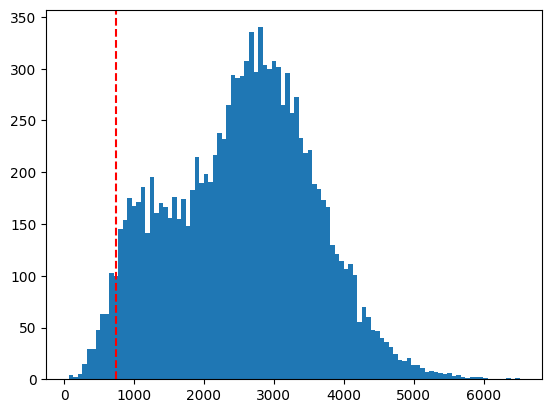

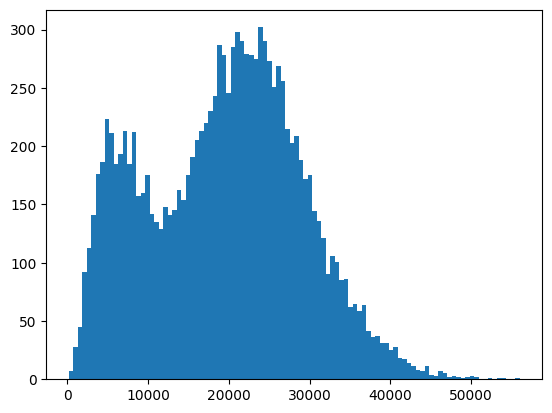

In [6]:
lengths = []
edgeLengths = []
for obj in tqdm(allLines):
    graph = obj['graph']

    nodes = graph['nodeDataArray']
    # print(len(nodes))
    # break
    nodesSet = set()
    # print("________________")
    for node in nodes:
        if node['key'] in nodesSet:
            print(node)
        nodesSet.add(node['key'])
    lengths.append(len(nodesSet))
    # print("________________")
    # verify edge duplicatio
    edges = graph['linkDataArray']
    edgesSet = set()
    for edge in edges:
        tup = (edge['from'], edge['to'])
        if tup in edgesSet:
            print(edge)
        edgesSet.add(tup)

    edgeLengths.append(len(edgesSet))

    

plt.hist(lengths, bins=100)
# make a line at 200
plt.axvline(x=k, color='r', linestyle='--')
plt.show()

plt.hist(edgeLengths, bins=100)
plt.show()


In [7]:
# sum of lengths
sum(lengths) / len(lengths) 

2541.5

In [8]:
sum(edgeLengths) / len(edgeLengths)

19356.451426686457

100%|██████████| 12126/12126 [00:05<00:00, 2405.49it/s]


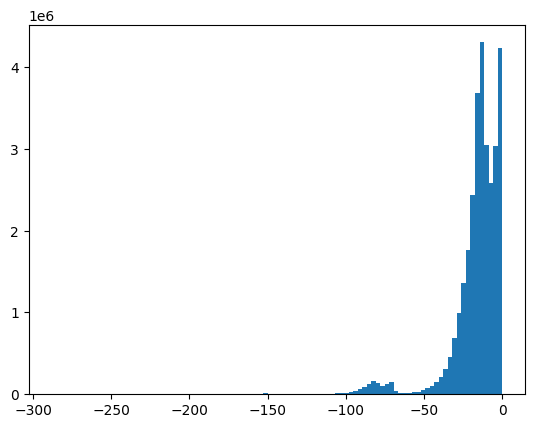

In [9]:
scores = []

for obj in tqdm(allLines):
    graph = obj['graph']

    nodes = graph['nodeDataArray']

    for node in nodes:
        score = node['score']
        scores.append(score)

plt.hist(scores, bins=100)
plt.show()

    


In [10]:
sum(scores) / len(scores)

-16.838081048594223

In [11]:
# RelScores = {}
# for obj in tqdm(allLines):
#     graph = obj['graph']
#     nodes = graph['nodeDataArray']
#     if obj['id'] not in RelScores:
#         RelScores[obj['id']] = {}

#     for node in nodes:
#         if node['key'] not in RelScores[obj['id']]:
#             RelScores[obj['id']][node['key']] = node['score']
#         elif abs(RelScores[obj['id']][node['key']] - node['score']) > 1e-3:
#             print("Duplicate key")
#             print(node)
#             print(obj['id'])
#             print(RelScores[obj['id']][node['key']])

# RelScores

In [12]:
# newFile = '/scratch/rahul.garg/conceptNet/allCmgs_fullContextFixed_h1.jsonl'
# # add these scores to its nodes
# jsonFile = open(newFile, 'r')
# allLines2 = jsonFile.readlines()
# jsonFile.close()

# for i in tqdm(range(len(allLines2))):
#     allLines2[i] = json.loads(allLines2[i])


In [13]:
# allLines2[0]

In [14]:
# for obj in tqdm(allLines2):
#     graph = obj['graph']
#     nodes = graph['nodeDataArray']
#     for node in nodes:
#         node['score'] = RelScores[obj['id']][node['key']]

# # newFile = '/scratch/rahul.garg/conceptNet/allCmgs_fullContextFixed_h1_withScores.jsonl'
# # jsonFile = open(newFile, 'w')
# # for obj in tqdm(allLines2):
# #     json.dump(obj, jsonFile)
# #     jsonFile.write('\n')

In [11]:
id2Concepts = {}

with open('../entityExtractionQagnn/ground_res_without_target.jsonl', 'r') as f:
    allCompulsoryNodes = f.readlines()
    for i in range(len(allCompulsoryNodes)):
        obj = json.loads(allCompulsoryNodes[i])
        id2Concepts[obj['id']] = obj['res']['qc']

id2Concepts

{37295: ['baby',
  'baby_girl',
  'black',
  'box',
  'camera',
  'cute',
  'get',
  'gift',
  'girl',
  'guy',
  'red',
  'see',
  'sit',
  'sitting',
  'smile',
  'smiling',
  'white'],
 6287: ['contest',
  'court',
  'gold',
  'gold_medal',
  'group',
  'medal',
  'outdoor',
  'people',
  'play',
  'playing',
  'playing_table_tennis',
  'spectator',
  'spectators',
  'surround',
  'surrounded',
  'table',
  'table_tennis',
  'tennis',
  'walk',
  'walking',
  'well',
  'wheelchair',
  'win',
  'winning'],
 42690: ['black',
  'gas',
  'glass',
  'juice',
  'man',
  'mustache',
  'ol',
  'old',
  'photograph',
  'photographed',
  'sad',
  'tie',
  'white'],
 39625: ['aerial',
  'aerial_view',
  'city',
  'city_skyline',
  'forget',
  'forgot',
  'government',
  'include',
  'including',
  'never',
  'never_forget',
  'new',
  'new_york',
  'new_york_city',
  'said',
  'say',
  'skyline',
  'tower',
  'towers',
  'twin',
  'twin_towers',
  'view',
  'vote',
  'york'],
 18542: ['day',
 

In [12]:
uniqueAbsents = set()

for obj in tqdm(allLines):
    # make copy
    id = obj['id']
    graph = obj['graph']

    nodes = graph['nodeDataArray']
    nodesPresent = set()
    # verify that all nodes are present
    for node in nodes:
        nodesPresent.add(node['key'])

    for key in id2Concepts[id]:
        if key not in nodesPresent:
            uniqueAbsents.add(key)
            # print("Node not present")
            # print(key)
            # print(id)

uniqueAbsents

100%|██████████| 12126/12126 [00:06<00:00, 1820.56it/s]


{'object', 'people', 'person', 'take', 'uk'}

In [14]:
allLines[0]['graph'].keys()

dict_keys(['class', 'nodeDataArray', 'linkDataArray', 'contextEmbed'])

100%|██████████| 12126/12126 [01:45<00:00, 115.32it/s]


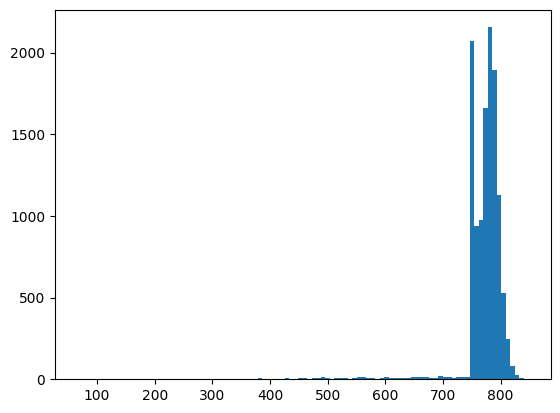

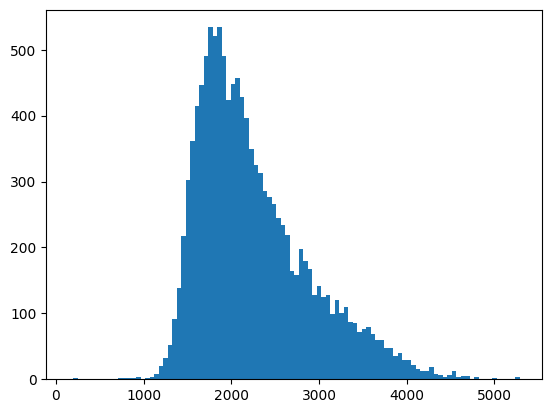

In [15]:
# make new file keeping only top k nodes

lengths = []
edgeLengths = []
for obj in tqdm(allLines):
    # make copy
    id = obj['id']
    graph = obj['graph']

    nodes = graph['nodeDataArray']
    # print(len(nodes))
    # nodes = sorted(nodes, key=lambda x: x['score'], reverse=True)
    # keep all relation nodes
    # relNodes = [node for node in nodes if 'color' not in node or node['color'] == 'yellow']
    # objNodes = [node for node in nodes if 'color' in node and node['color'] != 'yellow']
    # objNodes = sorted(objNodes, key=lambda x: x['score'], reverse=True)
    nodes = sorted(nodes, key=lambda x: x['score'], reverse=True)
    nodesFiltered = nodes[:k]
    # check if any compulsory node is after k and add it
    for i in range(k, len(nodes)):
        if nodes[i]['key'] in id2Concepts[id] or nodes[i]['key'] == 'QAcontext':
            nodesFiltered.append(nodes[i])
    # print(len(objNodes), len(relNodes))
    # nodes = relNodes + objNodes
    # print(len(nodes))

    # assert that all are unique
    # nodesSet = set()
    # for node in nodesFiltered:
    #     if node['key'] in nodesSet:
    #         print(node)
    #     nodesSet.add(node['key'])
    lengths.append(len(nodesFiltered))


    

    # linkDataArray.append({"from": source, "to": target, "relation": relation})
    
    # also update the links
    nodeKeys = set()
    for node in nodesFiltered:
        nodeKeys.add(node['key'])
    links = graph['linkDataArray']
    newLinks = []
    for link in links:
        if (link['from'] in nodeKeys and link['to'] in nodeKeys):
            newLinks.append(link)

    # connect QAcontext to all compulsory nodes
    assert 'QAcontext' in nodeKeys
    for key in id2Concepts[id]:
        if key in nodeKeys:
            newLinks.append({"from": "QAcontext", "to": key, "relation": "QAcontextRel"})
    graph['nodeDataArray'] = nodesFiltered
    # add to edgeLengths
    edgeLengths.append(len(newLinks))
    graph['linkDataArray'] = newLinks
    # remove contextEmbed from graph
    if 'contextEmbed' in graph:
        del graph['contextEmbed']

plt.hist(lengths, bins=100)
plt.show()

plt.hist(edgeLengths, bins=100)
plt.show()

In [16]:
allLines[0]['graph']['nodeDataArray']

[{'key': 'QAcontext', 'score': 0.0},
 {'key': 'come_out', 'color': '#ec8c69', 'score': -0.21925179660320282},
 {'key': 'go_away', 'color': '#ec8c69', 'score': -0.22167889773845673},
 {'key': 'come_back', 'color': '#ec8c69', 'score': -0.23153534531593323},
 {'key': 'get_ready', 'color': '#ec8c69', 'score': -0.23281162977218628},
 {'key': 'be_ready', 'color': '#ec8c69', 'score': -0.23815834522247314},
 {'key': 'all_right', 'color': '#ec8c69', 'score': -0.2392016053199768},
 {'key': 'get_out', 'color': '#ec8c69', 'score': -0.24644726514816284},
 {'key': 'right_now', 'color': '#ec8c69', 'score': -0.24676300585269928},
 {'key': 'always_be', 'color': '#ec8c69', 'score': -0.24793598055839539},
 {'key': 'take_over', 'color': '#ec8c69', 'score': -0.25193724036216736},
 {'key': 'good_to_go', 'color': '#ec8c69', 'score': -0.2523179352283478},
 {'key': 'go_out', 'color': '#ec8c69', 'score': -0.2575852870941162},
 {'key': 'all_set', 'color': '#ec8c69', 'score': -0.2646242380142212},
 {'key': 'stay_

In [17]:
newJsonlFile = f'/scratch/rahul.garg/new_target_fixed_h1RelKmgsTop{k}_noEmbed.jsonl'
jsonFile = open(newJsonlFile, 'w')
for line in tqdm(allLines, total=len(allLines), desc='Writing'):
    json.dump(line, jsonFile)
    jsonFile.write('\n')
jsonFile.close()

Writing: 100%|██████████| 12126/12126 [02:34<00:00, 78.53it/s]


In [18]:
allLines[0]['graph'].keys()

dict_keys(['class', 'nodeDataArray', 'linkDataArray'])